In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw5_v2.1_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(216, 8)


,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value
0,sadio_mané,0,0,0,1,6.191572,Liverpool,11.5
1,virgil_van_dijk,1,0,0,0,6.132387,Liverpool,6.5
2,sergio_agüero,0,1,0,0,5.900007,Manchester City,12.1
3,mohamed_salah,0,0,0,1,5.757501,Liverpool,12.5
4,andrew_robertson,1,0,0,0,5.729830,Liverpool,6.9


In [3]:
# Set predictions for known injured players to large negative number to force algorithm to subsitute them out of squad
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='aymeric_laporte', 'predictions'] = -9999
gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='nathan_redmond', 'predictions'] = -9999

In [4]:
gw1_team = [
    'mohamed_salah',
    'aymeric_laporte',
    'tom_heaton',
    'hugo_lloris',
    'patrick_van aanholt',
    'james_maddison',
    'ricardo domingos_barbosa pereira',
    'ayoze_pérez',
    'trent_alexander-arnold',
    'joel_matip',
    'callum_wilson',
    'joshua_king',
    'nathan_redmond',
    'ashley_barnes',
    'abdoulaye_doucouré'
]

In [5]:
len(gw1_team)

15

In [6]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,mohamed_salah,1
1,aymeric_laporte,1
2,tom_heaton,1
3,hugo_lloris,1
4,patrick_van_aanholt,1
5,james_maddison,1
6,ricardo_domingos_barbosa_pereira,1
7,ayoze_pérez,1
8,trent_alexander_arnold,1
9,joel_matip,1


In [7]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value,in_gw_1_team
0,sadio_mané,0,0,0,1,6.191572,Liverpool,11.5,0.0
1,virgil_van_dijk,1,0,0,0,6.132387,Liverpool,6.5,0.0
2,sergio_agüero,0,1,0,0,5.900007,Manchester City,12.1,0.0
3,mohamed_salah,0,0,0,1,5.757501,Liverpool,12.5,1.0
4,andrew_robertson,1,0,0,0,5.729830,Liverpool,6.9,0.0


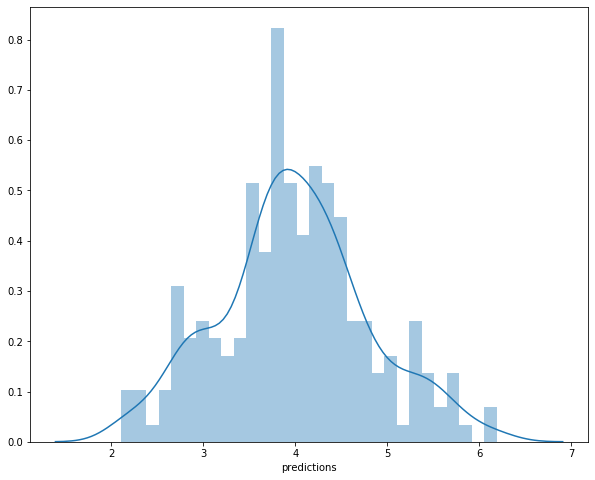

In [8]:
plt.figure(figsize=(10, 8))

sns.distplot(
    gw1_v1_player_predictions[gw1_v1_player_predictions['predictions'] > 0]['predictions'],
    bins=30
)

## Pick team

In [10]:
from pulp import *

In [11]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [12]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,sadio_mané,0,0,0,1,6.191572,11.5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,virgil_van_dijk,1,0,0,0,6.132387,6.5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sergio_agüero,0,1,0,0,5.900007,12.1,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,mohamed_salah,0,0,0,1,5.757501,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,andrew_robertson,1,0,0,0,5.729830,6.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
players = list(gw1_v1_player_predictions['name'])

In [14]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [15]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [16]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [17]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [18]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [19]:
prob = LpProblem('FPL team selection', LpMaximize)

In [20]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [21]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [22]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= 99.5, "Total cost less than X"

prob += lpSum([costs[p] * player_vars[p] for p in players]) >= 99.3, "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 13, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [23]:
prob.solve()

1

In [24]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_abdoulaye_doucouré = 1.0
player_ashley_barnes = 1.0
player_ashley_young = 1.0
player_ayoze_pérez = 1.0
player_callum_wilson = 1.0
player_david_silva = 1.0
player_hugo_lloris = 1.0
player_james_maddison = 1.0
player_joel_matip = 1.0
player_joshua_king = 1.0
player_mohamed_salah = 1.0
player_patrick_van_aanholt = 1.0
player_ricardo_domingos_barbosa_pereira = 1.0
player_tom_heaton = 1.0
player_trent_alexander_arnold = 1.0


In [25]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
3,mohamed_salah,0,0,0,1,5.757501,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,callum_wilson,0,1,0,0,5.687988,7.8,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,joshua_king,0,1,0,0,5.576883,6.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,david_silva,0,0,0,1,5.511175,7.5,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,trent_alexander_arnold,1,0,0,0,5.387548,7.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,ashley_barnes,0,1,0,0,5.273135,6.7,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,hugo_lloris,0,0,1,0,5.001432,5.5,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
36,ashley_young,1,0,0,0,4.728587,5.4,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
54,joel_matip,1,0,0,0,4.454378,5.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,tom_heaton,0,0,1,0,4.288948,4.5,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_selection.sum()

name                                 mohamed_salahcallum_wilsonjoshua_kingdavid_sil...
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
predictions                                                                    68.2188
next_match_value                                                                  99.5
in_gw_1_team                                                                        13
team_name_Arsenal                                                                    0
team_name_Aston Villa                                                                1
team_name_Bournemouth                                                                2
team_name_Brighton & Hove Albion           

## Starting 11

In [27]:
players = list(test_selection['name'])

In [28]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [29]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [30]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [31]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [32]:
prob = LpProblem('FPL team selection', LpMaximize)

In [33]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [34]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [35]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [36]:
prob.solve()

1

In [37]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_abdoulaye_doucouré = 1.0
player_ashley_barnes = 1.0
player_ashley_young = 1.0
player_ayoze_pérez = 1.0
player_callum_wilson = 1.0
player_david_silva = 1.0
player_hugo_lloris = 1.0
player_joel_matip = 1.0
player_joshua_king = 1.0
player_mohamed_salah = 1.0
player_trent_alexander_arnold = 1.0


In [38]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
3,mohamed_salah,0,0,0,1,5.757501,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,callum_wilson,0,1,0,0,5.687988,7.8,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,joshua_king,0,1,0,0,5.576883,6.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,david_silva,0,0,0,1,5.511175,7.5,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,trent_alexander_arnold,1,0,0,0,5.387548,7.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,ashley_barnes,0,1,0,0,5.273135,6.7,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,hugo_lloris,0,0,1,0,5.001432,5.5,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
36,ashley_young,1,0,0,0,4.728587,5.4,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
54,joel_matip,1,0,0,0,4.454378,5.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,abdoulaye_doucouré,0,0,0,1,3.904327,5.8,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
test_selection[test_selection['name'] != 'mohamed_salah']['predictions'].sum() + test_selection[test_selection['name'] == 'mohamed_salah']['predictions'].sum() * 2

73.9762702003936

In [41]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,mohamed_salah,1
1,callum_wilson,1
2,joshua_king,1
3,david_silva,1
4,trent_alexander_arnold,1
5,ashley_barnes,1
6,hugo_lloris,1
7,ashley_young,1
8,joel_matip,1
9,abdoulaye_doucouré,1


In [42]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,mohamed_salah,0,0,0,1,5.757501,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,callum_wilson,0,1,0,0,5.687988,7.8,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,joshua_king,0,1,0,0,5.576883,6.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,david_silva,0,0,0,1,5.511175,7.5,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,trent_alexander_arnold,1,0,0,0,5.387548,7.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,ashley_barnes,0,1,0,0,5.273135,6.7,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6,hugo_lloris,0,0,1,0,5.001432,5.5,1.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
7,ashley_young,1,0,0,0,4.728587,5.4,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
8,joel_matip,1,0,0,0,4.454378,5.4,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,tom_heaton,0,0,1,0,4.288948,4.5,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0.0


In [44]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw5_v2_1_team_selections.parquet', index=False)